In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ads_Optimisation.csv")
df.head

<bound method NDFrame.head of       Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]>

Implementing Thomson Sampling

In [25]:
from msilib import add_stream
import random
N = df.shape[0]
d = df.shape[1]
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = [0]

for n in range(N):
    ad = 0
    max_random_beta = 0
    for i in range(d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random_beta:
            max_random_beta = random_beta
            ad = 1
    ads_selected.append(ad)
    reward = df.iloc[n,ad]
    if reward ==1:
        number_of_rewards_1[ad] +=1
    else:
        number_of_rewards_0[ad] +=1
    total_reward += reward
print(total_reward)

[1295]


Visualising the result

Text(0, 0.5, 'Nunmer of times each ad was selected by the algorithm')

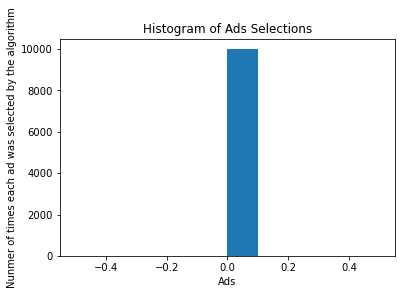

In [24]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Nunmer of times each ad was selected by the algorithm')